<a href="https://colab.research.google.com/github/crimama/crimama/blob/Bigdata_course/12_1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D1%EC%9D%BC%EC%B0%A8_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12월 1일 : 머신러닝 1일차 

- KNN(k - nearest neighbor) 알고리즘 
  - 지도학습 - 분류기법 - 첫번째 
  - 분류 기법 
  - 최적의 인근 갯수? 5개가 최적일지, 10개가 최적일지 
- 생선 분류 문제 
- 기법 적용하기 전에 데이터 셋을 만들어야 함 


# 물고기 종류 분류 문제 
- knn 사용 

In [44]:
import pandas as pd 
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 변수별로 데이터 분류 

In [41]:
bream_length = list(df.loc[df['Species'] == 'Bream']['Length1'])
bream_weight = list(df.loc[df['Species'] == 'Bream']['Weight'])
smelt_length = list(df.loc[df['Species'] == 'Smelt']['Length2'])
smelt_weight = list(df.loc[df['Species'] == 'Smelt']['Weight'])

In [45]:
import matplotlib.pyplot as plt

## 분류한 데이터 시각화 

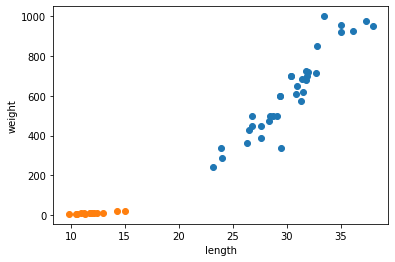

In [56]:

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#이런 식으로 두가지로 나누는 것을 이진분류
#클래스가 두개 -> 이진 분류
#여기서 도미가 정답으로 1번, 빙어가 오답으로 0번을 가짐 
#데이터로 학습시킨 뒤 새로운 데이터로 도미를 맞추는 것이 목적

## 머신러닝 (KNN) 
- 머신러닝 돌리기 전에 변수들을 합쳐야 함 


### 학습을 위한 데이터 생성 

In [85]:
#변수들 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#zip을 이용한 2차원 데이터 생성 
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

#정답 데이터 만들기 
fish_target = [1]*35 + [0]*14
print(fish_target)

[[23.2, 242.0], [24.0, 290.0], [23.9, 340.0], [26.3, 363.0], [26.5, 430.0], [26.8, 450.0], [26.8, 500.0], [27.6, 390.0], [27.6, 450.0], [28.5, 500.0], [28.4, 475.0], [28.7, 500.0], [29.1, 500.0], [29.5, 340.0], [29.4, 600.0], [29.4, 600.0], [30.4, 700.0], [30.4, 700.0], [30.9, 610.0], [31.0, 650.0], [31.3, 575.0], [31.4, 685.0], [31.5, 620.0], [31.8, 680.0], [31.9, 700.0], [31.8, 725.0], [32.0, 720.0], [32.7, 714.0], [32.8, 850.0], [33.5, 1000.0], [35.0, 920.0], [35.0, 955.0], [36.2, 925.0], [37.4, 975.0], [38.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 모델링 만들기 (학습) 
- 알고리즘 -> 데이터 학습 -> 모델

In [147]:
from sklearn.neighbors import KNeighborsClassifier

#knn 알고리즘을 kn에 넣고, 데이터를 훈련 시켜서 kn 모델을 만듬 
kn = KNeighborsClassifier() #kn에 knn 모델을 넣음 

#.fit() : 모델링 훈련시키는 함수 
#지도학습이기 때문에 데이터와 값을 다 넣어주어야 함
kn.fit(fish_data,fish_target)

#.score() : 점수를 알 수 있음 
kn.score(fish_data,fish_target) #score는 이 모델링의 정확도 
#머신러닝의 결과는 점수, 숫자로 결과가 나옴 

1.0

### 데이터로 테스트 

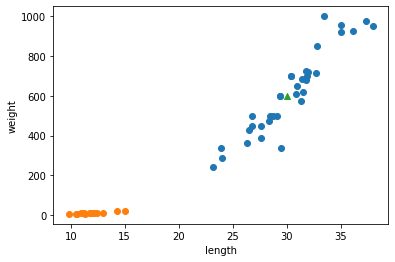

In [87]:
#테스트할 데이터의 위치를 출력 
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [94]:
kn.predict([[30,600]])

array([1])

### 최적 이웃 범위 찾기 

In [95]:
#주변에 몇개까지 비교할 것인지 
#주변에 몇개를 비교할 때 정확한 값이 나올 것인가 
#knn은 최근접 이웃의 범위를 얼만큼 잡을 것인가
#여기서 최근접 이웃의 범위를 전체로 할 경우 도미일 확률인 35/49
#최고의 확률을 구하기 위해 5 부터 49까지 범위를 하나씩 늘어가며 확률이 몇일 때 높은지 확인 

In [160]:
from sklearn.neighbors import KNeighborsClassifier

#knn 알고리즘을 kn에 넣고, 데이터를 훈련 시켜서 kn 모델을 만듬 
kn = KNeighborsClassifier() 
kn.fit(fish_data,fish_target)

for n in range(5,50):
  #최근접 이웃 개수 설정 
  kn.n_neighbors = n
   #점수 계산 
  score = kn.score(fish_data,fish_target) #학습된 데이터가 100% 맞음을 의미 함, 연습문제로 시험을 봄, k값을 기본 5개로 했을 경우 
  #100%정확도에 미치지 못하는 이웃 개수 출력 

  if score <1: #n수가 커지면서 비교하는 근접 갯수가 많아져 정답률이 100%이하로 떨어짐 
    print(n,score)
    break

18 0.9795918367346939


# 오렌지 vs 자몽 분류 문제 

In [171]:
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 변수별로 데이터 분류 

In [243]:
orange_diameter = list(df.loc[df['name'] == 'orange']['diameter'])
orange_weight = list(df.loc[df['name'] == 'orange']['weight'])
grape_diameter = list(df.loc[df['name'] == 'grapefruit']['diameter'])
grape_weight = list(df.loc[df['name'] == 'grapefruit']['weight'])

## 분류한 데이터 시각화 

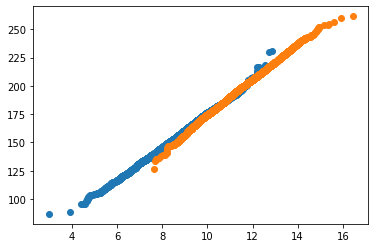

In [244]:
import matplotlib.pyplot as plt 

plt.scatter(orange_diameter,orange_weight)
plt.scatter(grape_diameter,grape_weight)

## 머신러닝(KNN)
- diamter와 weight를 줄때 오렌지일까 자몽일까 맞추기 

### 학습을 위한 데이터 생성

In [266]:
#변수들 합치기 
diameter = orange_diameter + grape_diameter
weight = orange_weight + grape_weight

#zip 을 이용한 2차원 문제 데이터 생성 
fruit_data = [[d,w] for d,w in zip(diameter,weight)]

#정답 데이터 만들기 
fruit_target = [1]*5000 + [0]*5000
print(fruit_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### 모델링 만들기(학습) 

In [267]:
#knn 알고리즘 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fruit_data,fruit_target)

kn.score(fruit_data,fruit_target) #kn.n_neighbors = 5일 경우 


0.9833

### neighbors 최적화 

In [229]:
score = []
for n in range(1,100): #34초 
  kn.n_neighbors = n
  temp_score = kn.score(fruit_data,fruit_target)
  score.append(temp_score)
print(score)

[0.9999, 0.9921, 0.9915, 0.9838, 0.9833, 0.9746, 0.9749, 0.9684, 0.9664, 0.9623, 0.9593, 0.9556, 0.9535, 0.9496, 0.9449, 0.9414, 0.9373, 0.9346, 0.9305, 0.9294, 0.9245, 0.9228, 0.9208, 0.9193, 0.9172, 0.9167, 0.9129, 0.9137, 0.9104, 0.9116, 0.9066, 0.9078, 0.9064, 0.9055, 0.9026, 0.9028, 0.9013, 0.9008, 0.8988, 0.9009, 0.8995, 0.9001, 0.8992, 0.8992, 0.8982, 0.8976, 0.897, 0.8966, 0.8973, 0.8972, 0.8966, 0.8955, 0.8962, 0.8953, 0.8958, 0.8941, 0.8938, 0.8921, 0.8921, 0.8934, 0.8919, 0.8926, 0.8911, 0.8908, 0.8903, 0.8899, 0.8893, 0.8891, 0.8887, 0.8893, 0.8882, 0.888, 0.8871, 0.8864, 0.8864, 0.8872, 0.8868, 0.8866, 0.8861, 0.8845, 0.8839, 0.8852, 0.8832, 0.8828, 0.8834, 0.8834, 0.8843, 0.8841, 0.8837, 0.8835, 0.8821, 0.8842, 0.8827, 0.8842, 0.8828, 0.8834, 0.882, 0.8824, 0.8824]


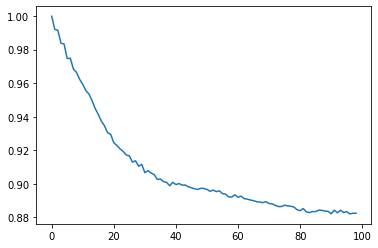

In [268]:
plt.plot(score)

### 예측하기 

In [269]:
print(kn.predict([[16,251]]),
kn.predict([[10.5,181.7]]),
kn.predict([[5,104]]))

[0] [0] [1]


# 여기서부터는 딴짓 

In [250]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [270]:
orange_diameter = list(df.loc[df['name'] == 'orange']['diameter'])
orange_weight = list(df.loc[df['name'] == 'orange']['weight'])
orange_red = list(df.loc[df['name'] == 'orange']['red'])
orange_green = list(df.loc[df['name'] == 'orange']['green'])
orange_blue = list(df.loc[df['name'] == 'orange']['blue'])
grape_diameter = list(df.loc[df['name'] == 'grapefruit']['diameter'])
grape_weight = list(df.loc[df['name'] == 'grapefruit']['weight'])
grape_red = list(df.loc[df['name'] == 'grapefruit']['red'])
grape_green = list(df.loc[df['name'] == 'grapefruit']['green'])
grape_blue = list(df.loc[df['name'] == 'grapefruit']['blue'])

In [254]:
red = orange_red + grape_red
blue = orange_blue + grape_blue
green = grape_green +grape_green

In [272]:
fruit_data = [[d,w,r,b,g] for d,w,r,b,g in zip(diameter,weight,red,blue,green)]

fruit_target = [1]*5000 + [0]*5000

In [273]:
#knn 알고리즘 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fruit_data,fruit_target)

kn.score(fruit_data,fruit_target) #kn.n_neighbors = 5일 경우 


0.9204

In [274]:
score = []
for n in range(1,50): #34초 
  kn.n_neighbors = n
  temp_score = kn.score(fruit_data,fruit_target)
  score.append(temp_score)
print(score)

[1.0, 0.9316, 0.9316, 0.9211, 0.9204, 0.9153, 0.9156, 0.913, 0.912, 0.9119, 0.9109, 0.9116, 0.9094, 0.9102, 0.9097, 0.9096, 0.9086, 0.9092, 0.9093, 0.909, 0.9091, 0.9104, 0.9081, 0.909, 0.9076, 0.9083, 0.9081, 0.9084, 0.9075, 0.9071, 0.9059, 0.9059, 0.905, 0.9062, 0.9068, 0.9073, 0.9074, 0.909, 0.908, 0.909, 0.9079, 0.9091, 0.9077, 0.9079, 0.9067, 0.9071, 0.907, 0.9074, 0.9067, 0.9064, 0.9053, 0.9054, 0.9061, 0.9067, 0.906, 0.9069, 0.9065, 0.9069, 0.9063, 0.9062, 0.9056, 0.9057, 0.9052, 0.9062, 0.9062, 0.906, 0.9055, 0.9057, 0.9058, 0.9064, 0.9054, 0.9058, 0.9052, 0.9057, 0.9056, 0.9059, 0.9052, 0.9055, 0.9047, 0.9055, 0.9057, 0.9059, 0.9058, 0.9063, 0.9054, 0.9054, 0.9054, 0.9056, 0.9051, 0.9052, 0.9047, 0.9055, 0.9052, 0.9055, 0.9048, 0.9052, 0.9049, 0.9058, 0.9055]


In [278]:
import pandas as pd

In [288]:
test1 = df.loc[df['name'] == 'orange']['diameter'].round()


### 딴짓 2

In [292]:
orange_diameter = list(df.loc[df['name'] == 'orange']['diameter'].round())
orange_weight = list(df.loc[df['name'] == 'orange']['weight'].round())
grape_diameter = list(df.loc[df['name'] == 'grapefruit']['diameter'].round())
grape_weight = list(df.loc[df['name'] == 'grapefruit']['weight'].round())

red = orange_red + grape_red
blue = orange_blue + grape_blue
green = grape_green +grape_green

fruit_data = [[d,w,r,b,g] for d,w,r,b,g in zip(diameter,weight,red,blue,green)]

fruit_target = [1]*5000 + [0]*5000

#knn 알고리즘 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fruit_data,fruit_target)

kn.score(fruit_data,fruit_target) #kn.n_neighbors = 5일 경우 

score = []
for n in range(1,50): #34초 
  kn.n_neighbors = n
  temp_score = kn.score(fruit_data,fruit_target)
  score.append(temp_score)
print(score)

[1.0, 0.9316, 0.9316, 0.9211, 0.9204, 0.9153, 0.9156, 0.913, 0.912, 0.9119, 0.9109, 0.9116, 0.9094, 0.9102, 0.9097, 0.9096, 0.9086, 0.9092, 0.9093, 0.909, 0.9091, 0.9104, 0.9081, 0.909, 0.9076, 0.9083, 0.9081, 0.9084, 0.9075, 0.9071, 0.9059, 0.9059, 0.905, 0.9062, 0.9068, 0.9073, 0.9074, 0.909, 0.908, 0.909, 0.9079, 0.9091, 0.9077, 0.9079, 0.9067, 0.9071, 0.907, 0.9074, 0.9067]


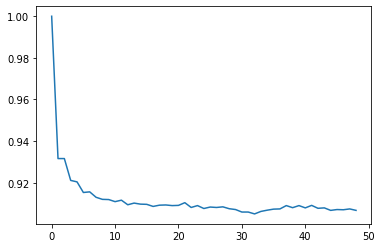

In [293]:
plt.plot(score)